In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mt
import matplotlib.patches as mp
import datetime 
import os
%matplotlib inline

df_1=pd.read_csv(os.getcwd()+'/data/iig_maitri2012-15.csv')
df_1.iloc[:,0]
index=pd.to_datetime(df_1.iloc[:,0])
index
df = pd.DataFrame(data=df_1.values[:,1:],index=index,columns=['t','rh','ws','wd','ap'])
idx = pd.date_range('2012-01-01 00:00:00','2015-12-31 23:00:00',freq='H')
df=df.reindex(idx,fill_value=None)
#filling none values
for col in df:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.interpolate()

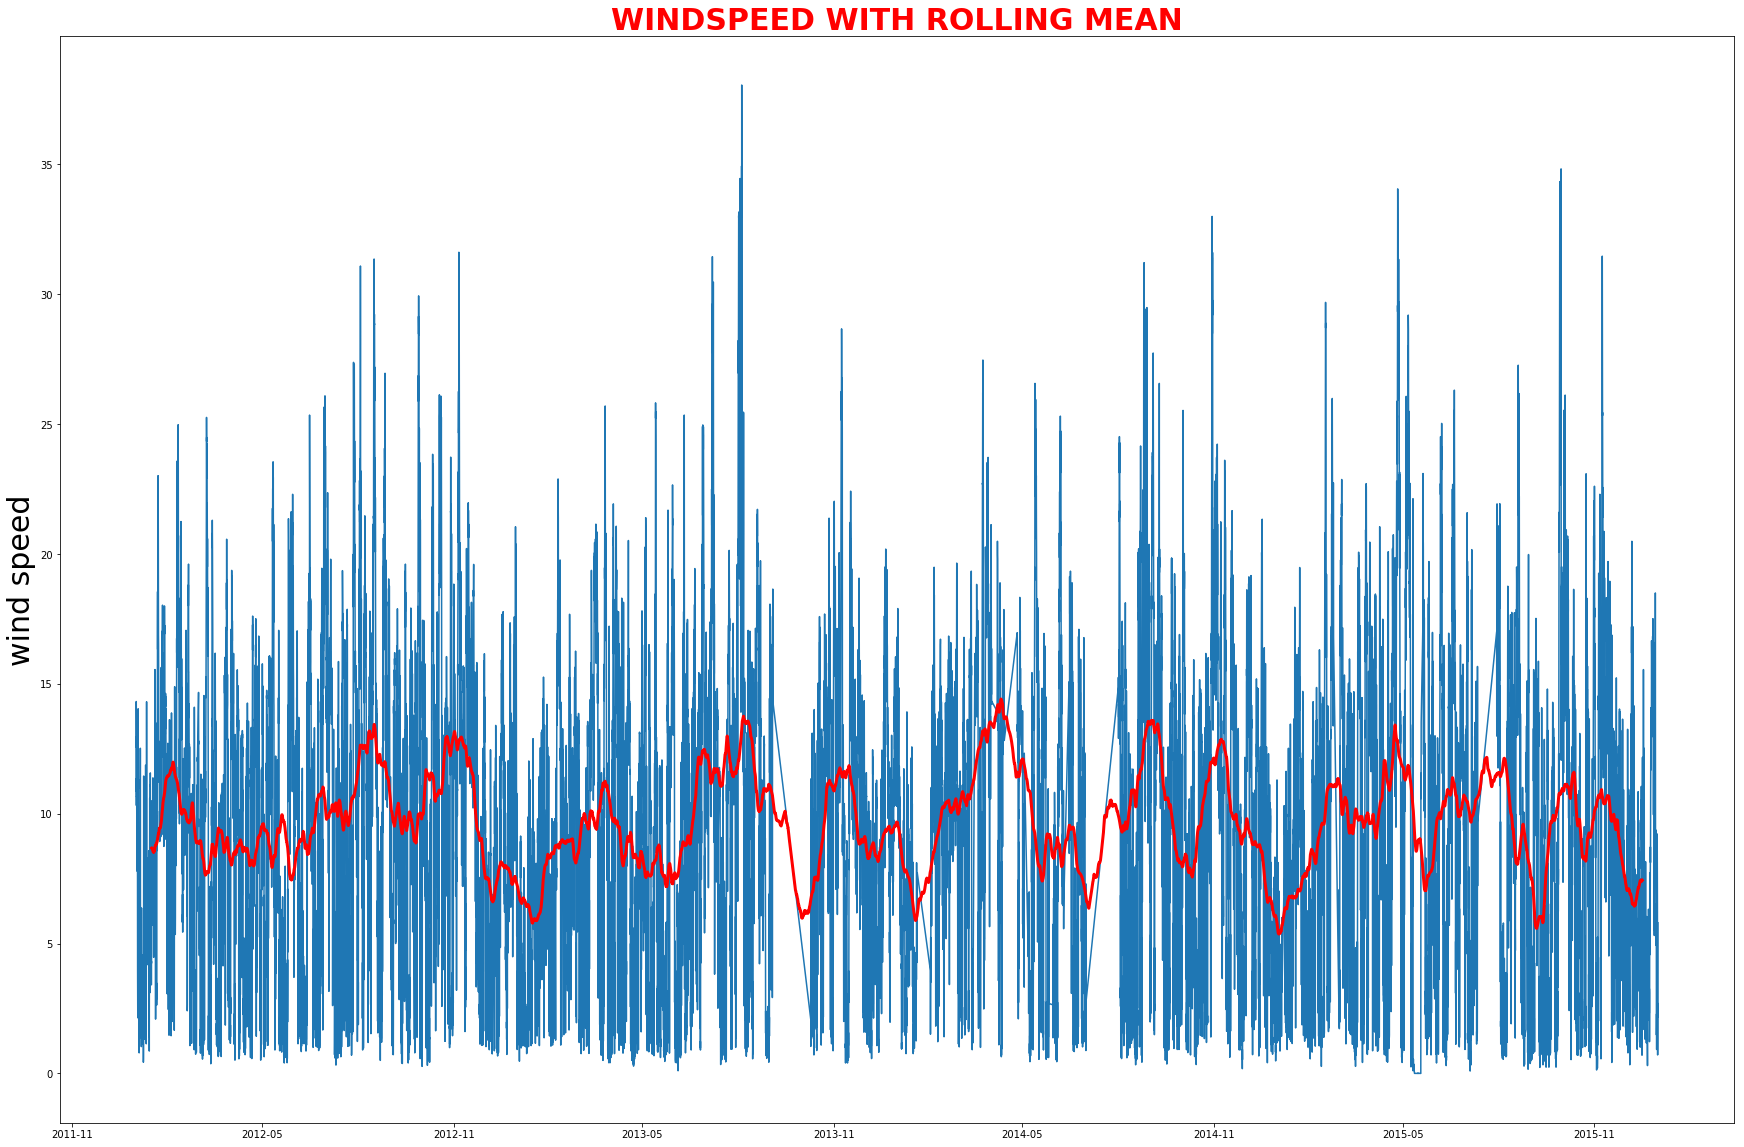

In [3]:
x=df['2012-01':'2015-12']

#movingaverage using rolling funct
z=x.iloc[:,2].rolling(720,center=True).mean()

plt.figure(figsize=(30,20))
plt.plot(x.index,x.iloc[:,2]) 
plt.plot(x.index,z,color = 'r',linewidth=3)
plt.ylabel('wind speed',fontsize=30)
plt.title("WINDSPEED WITH ROLLING MEAN",fontdict = {'fontweight': 'bold', 'color': 'red','fontsize':30})
plt.show()  

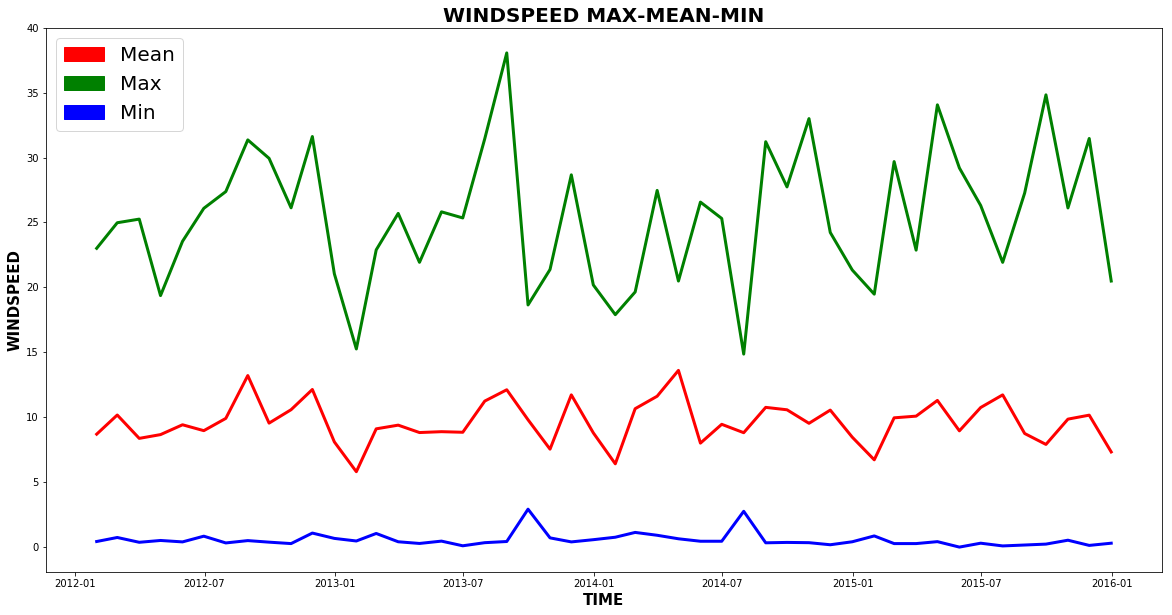

In [4]:
x=pd.DataFrame(data=df['ws'],index=df.index)
#maximum min mean
grp=x.groupby(pd.TimeGrouper('M'))
grp.mean()
t1=[]
tmean=[]
tmax=[]
tmin=[]
for t,i in grp:
    t1.append(t)
    tmax.append(i.max().iloc[0])
    tmean.append(i.mean().iloc[0])
    tmin.append(i.min().iloc[0])

y= pd.DataFrame(index=t1)
y['mean']=tmean
y['max']=tmax
y['min']=tmin


plt.figure(figsize=(20,10))
plt.plot(y.index,y['mean'],color = 'r',linewidth=3)
plt.plot(y.index,y['max'],color = 'g',linewidth=3)
plt.plot(y.index,y['min'],color = 'b',linewidth=3)
ax = plt.gca()
ax.set_xlabel("TIME",fontdict = {'fontweight': 'bold', 'color': 'black','fontsize':15})
ax.set_ylabel("WINDSPEED",fontdict = {'fontweight': 'bold', 'color': 'black','fontsize':15})
ax.legend(handles = [mp.Patch(color='r',label="Mean"),
    mp.Patch(color='g',label="Max"), mp.Patch(color='b',label="Min")]
    , prop = {'size': 20})
plt.title("WINDSPEED MAX-MEAN-MIN",fontdict = {'fontweight': 'bold', 'color': 'black','fontsize':20})

plt.show()


In [5]:
#above 23 for 6hrs
threshold = 23
hours=3

In [6]:
x=pd.DataFrame(data=df['ws'],index=df.index)
y=[True if t>threshold else False for t in df['ws'] ]
x['bli']=y

max =0
count =0
for i in x.index:
    if(x.loc[i,'bli']==True):
        count=count+1
        if count>max:
            max = count
            pos = i 
    else:
        count=0


print("longest blizzard ended on "+str(pos)+" and lasted for "+str(max)+" hours")

longest blizzard ended on 2015-04-27 17:00:00 and lasted for 50 hours


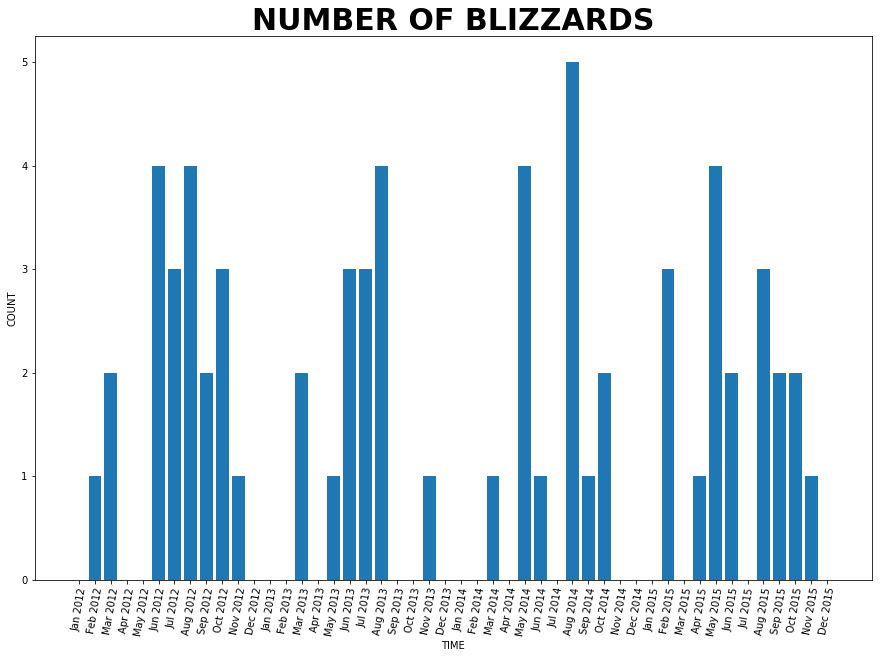

In [7]:
x=pd.DataFrame(data=df['ws'],index=df.index)

#monthwise distribution of blizzards
grp = x.groupby(pd.TimeGrouper('M'))
n=pd.DataFrame(index=grp.count().index)

start = '2012-01-01'
count = []
for i in n.index:
    t=x[start:str(i.year)+'-'+str(i.month)+'-'+str(i.day)]
    start=i+pd.DateOffset(1)
    h=[True if u>threshold else False for u in t['ws'] ]
    t=0
    c=0
    p=False
    
    for i in h:
        if(i==True):
            c=c+1
            if(c>=hours):
                if(p==False):
                    p=True
                    t=t+1
            
        else:
            c=0
            p=False 
    count.append(t)

    
n['bli_num']=count
def custom_formatter(x, pos):
  d = n.axes[0][x].to_pydatetime()
  return d.strftime("%b %Y")

fig, ax = plt.subplots(figsize=(15,10))
xloc = np.arange(0, 1 * len(list(n['bli_num'])), 1)
ax.bar(xloc, list(n['bli_num']), tick_label = [x.to_pydatetime() for x in n.axes[0]])
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 80)
ax.xaxis.set_major_locator(mt.FixedLocator(xloc))
ax.xaxis.set_major_formatter(mt.FuncFormatter(custom_formatter))
plt.title("NUMBER OF BLIZZARDS",fontdict = {'fontweight': 'bold', 'color': 'BLACK','fontsize':30})

ax.set_ylabel('COUNT')
ax.set_xlabel('TIME')
plt.show()
